<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Metodo_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:pink;">MÉTODO GALERKIN</span>

Este es un tipo de metodo de residuos pesados, donde las funciones de peso coinciden con las funciones base $β_i$

El método de Galerkin es una técnica numérica que se usa para obtener soluciones aproximadas de ecuaciones diferenciales parciales cuando la solución exacta es difícil o imposible de encontrar.

La idea principal es aproximar la solución de la EDP como una combinación de funciones conocidas (funciones base) que cumplen las condiciones de frontera del problema. Estas funciones suelen ser senos, cosenos o polinomios.

Queremos resolver la ecuación
$$\frac{d^2u}{dx^2}+u=-x$$
sujeta a las condiciones:
$$u(0)=u(1)=0$$


**Ejercicio 5.12**

$$-u ''(x) + u(x) - x = 0$$

Con las condiciones de frontera
$$u(0)= 0$$ $$u(1)=0$$

Utilice el método de Galerkin para obtener una aproximación de la solución
tomando como funciones base
$$\phi_i(x) = \sin(i\pi x), \qquad i = 1,2,3.$$

Busque una solución aproximada de la forma
$$ u_3(x) = \sum_{i=1}^{3} \alpha_i \sin(i\pi x)
= \alpha_1 \sin(\pi x)
+ \alpha_2 \sin(2\pi x)
+ \alpha_3 \sin(3\pi x).$$

Analíticamente:

In [25]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [26]:
x = sp.symbols('x') #introducimos una variable
u = sp.Function('u') #introducimos una funcion

Definimos la ecuacion diferencial ordinaria asociada al problema $$-u''(x) + u(x) - x = 0$$

In [27]:
ode= u(x).diff(x,x) - u(x) + x # está estructura es un diccionario
sp.dsolve(ode,u(x))

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

Con dsolve se obtiene la solucion exacta con las condiciones $$ u(0) = 0 = u(1) = 0$$

In [28]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})

Obtenemos la solucion

In [29]:
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

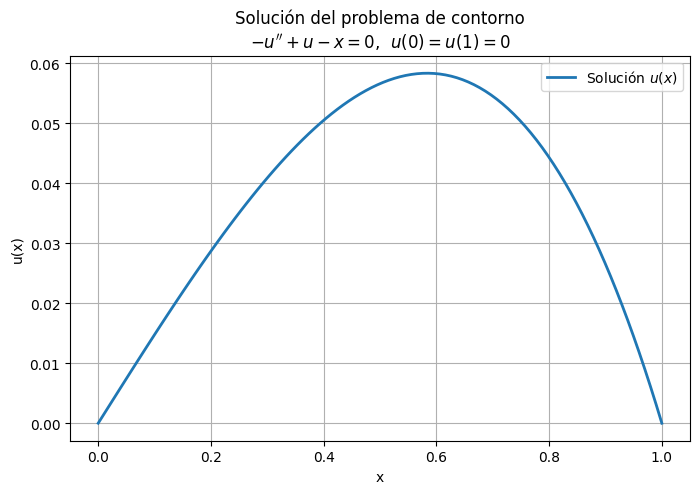

In [53]:
#Convertimos en un arreglo de numpy, para poder graficar
u_expr = sol.rhs

u_num = sp.lambdify(x, u_expr, "numpy")

#################
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title("Solución del problema de contorno\n$-u'' + u -x = 0$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Definicion de la aproximacion de Galerkin

In [35]:
a, b, c = sp.symbols('a b c')

#Función de prueba u_n(x) que cumple u(0)=u(1)=0

#Se definen los coeficiontes desconocidos

u_2 = (
    a * sp.sin(sp.pi * x)
  + b * sp.sin(2 * sp.pi * x)
  + c * sp.sin(3 * sp.pi * x)
)

In [38]:
u_2

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x)

Definimos el residuo (error) E

In [39]:
#Calculo la segunda derivada
u_2_d_2 = sp.diff(u_2, x, 2)

E = u_2_d_2 - u_2 + x

In [40]:
E

-a*sin(pi*x) - b*sin(2*pi*x) - c*sin(3*pi*x) + x - pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

In [41]:
E.simplify()

-a*sin(pi*x) - b*sin(2*pi*x) - c*sin(3*pi*x) + x - pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

El metodo de Galerkin impone que el residuo sea ortogonal a cada funcion base:

Ahora, imponemos las condiciones:

$$\int_0^1 Ex(1-x)dx=0$$
$$\int_0^1 Ex^2(1-x)dx=0$$
$$\int_0^1 Ex^3(1-x)dx=0$$

Se genera un sistema algebraico para los coeficientes

In [42]:
I_1 = sp.integrate(E*x*(1-x), (x, 0, 1))
I_2 = sp.integrate(E*x**2*(1-x), (x, 0, 1))
I_3 = sp.integrate(E * sp.sin(3 * sp.pi * x), (x, 0, 1))

In [43]:
I_1

-4*a/pi - 4*a/pi**3 - 4*c/(3*pi) - 4*c/(27*pi**3) + 1/12

In [44]:
I_2

-2*a/pi - 2*a/pi**3 + 3*b/(4*pi**3) + 3*b/pi - 2*c/(3*pi) - 2*c/(27*pi**3) + 1/20

In [46]:
I_3

-9*pi**2*c/2 - c/2 + 1/(3*pi)

Se resuelve el sistema para encontrar los valores de $a,b,c$

In [47]:
soleq = sp.solve([I_1, I_2, I_3], [a, b, c], simplify=True)
soleq

{a: (-32 + 27*pi**4)/(1296*pi*(1 + pi**2)),
 b: -pi**3/(90 + 360*pi**2),
 c: 2/(3*pi + 27*pi**3)}

In [48]:
u_approx = u_2.subs(soleq)
u_approx

(-32 + 27*pi**4)*sin(pi*x)/(1296*pi*(1 + pi**2)) - pi**3*sin(2*pi*x)/(90 + 360*pi**2) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [49]:
u_approx.simplify()

-(32 - 27*pi**4)*sin(pi*x)/(1296*pi*(1 + pi**2)) - pi**3*sin(2*pi*x)/(90 + 360*pi**2) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [50]:
u_approx_fn = sp.lambdify(x, u_approx, 'numpy')

####Grafica de la comparacion de las dos soluciones

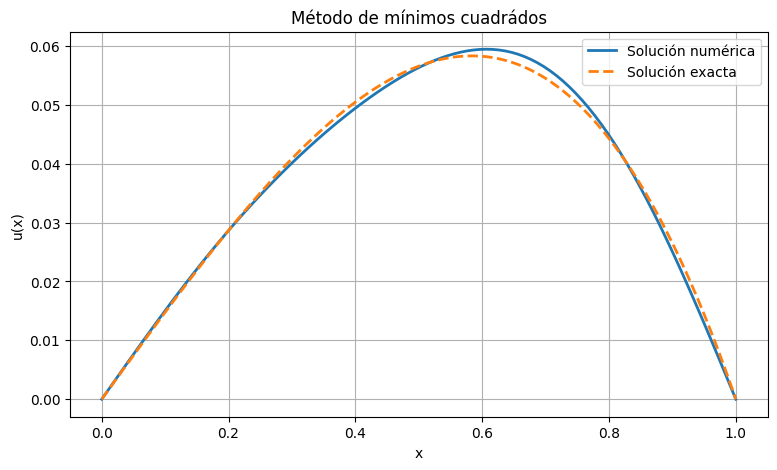

In [51]:
#Solución analítica y numérica
xx = np.linspace(0, 1, 100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label="Solución numérica", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)

plt.title("Método de mínimos cuadrádos")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

La gráfica muestra que la solución obtenida por Galerkin se aproxima muy bien a la solución exacta en todo el intervalo.
Ambas coinciden en los extremos y presentan formas similares.

####Calculo del error

Error máximo: 0.001827994311767292


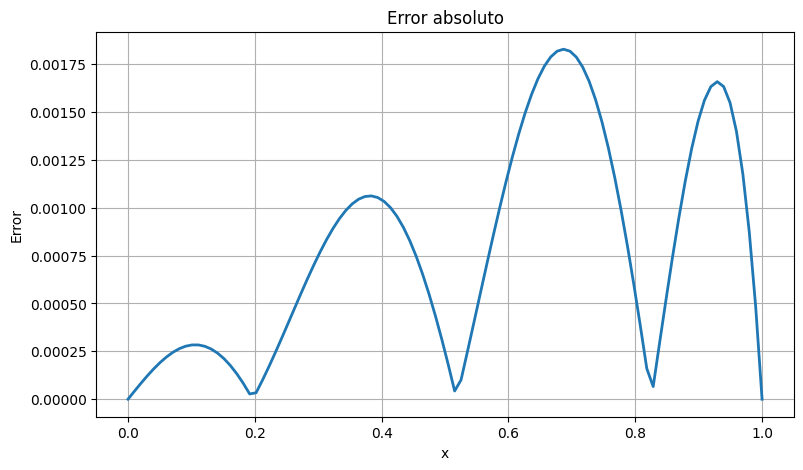

In [52]:
error = np.abs(yy - u_approx_fn(xx))
print("Error máximo:", np.max(error))

plt.figure(figsize=(9,5))
plt.plot(xx, error, linewidth=2)
plt.title("Error absoluto")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid(True)
plt.show()

Esta gráfica muestra la magnitud del error en cada punto del intervalo.
El error es pequeño en todo el dominio, lo que confirma que la aproximación de Galerkin con tres funciones seno es adecuada.
Al aumentar el número de funciones base, el error disminuiría aún más.

**Conclusion:** La solución obtenida con el método de Galerkin se parece mucho a la solución exacta y cumple las condiciones de frontera. En las gráficas se observa que ambas curvas casi coinciden en todo el intervalo. El error es pequeño, lo que indica que la aproximación es buena aun usando solo tres funciones seno.